In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime as dt

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages

In [2]:
biden_df = pd.read_csv("biden1_2020.csv")

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
biden_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1312905335737257984,1312831100914405379,2020-10-04 19:59:59 Eastern Daylight Time,2020-10-04,19:59:59,-400,1301748230015692800,stevese03250566,steve sellers,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN,NaN,NaN,NaN
1,1312905335602999296,1312905335602999296,2020-10-04 19:59:59 Eastern Daylight Time,2020-10-04,19:59:59,-400,700550947,helster_62,Helen Zuniga,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN,NaN,NaN,NaN
2,1312905332461633536,1312875881568763904,2020-10-04 19:59:58 Eastern Daylight Time,2020-10-04,19:59:58,-400,784027235627962368,citizenthegame,citizenthegame,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '15576928', 'username': 'goldengat...",NaN,NaN,NaN,NaN
3,1312905332319031297,1312905332319031297,2020-10-04 19:59:58 Eastern Daylight Time,2020-10-04,19:59:58,-400,14511397,cingroomer,Cindy Ballard,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1312905329252864000,1312755702113472515,2020-10-04 19:59:57 Eastern Daylight Time,2020-10-04,19:59:57,-400,1344901682,rebeccabguinn,Rebecca B Guinn,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1301577497042186241', 'username':...",NaN,NaN,NaN,NaN


In [4]:
biden_df.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [5]:
biden_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   12
place              169248
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            169268
quote_url          152886
video                   0
thumbnail          150076
near               169268
geo                169268
source             169268
user_rt_id         169268
user_rt            169268
retweet_id         169268
reply_to                0
retweet_date       169268
translate          169268
trans_src          169268
trans_dest         169268
dtype: int64

In [6]:
biden_df.retweet.value_counts()

Series([], Name: retweet, dtype: int64)

In [7]:
biden_df.shape

(169268, 36)

In [8]:
#columns to drop[]

In [9]:
columns = ["place", "retweet", "quote_url", "near", "geo", "source", "user_rt_id", "user_rt", "retweet_date", "retweet_id", "translate", "trans_src", "trans_dest"]

In [10]:
biden_df.drop(columns, axis=1, inplace=True)

In [11]:
biden_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1312905335737257984,1312831100914405379,2020-10-04 19:59:59 Eastern Daylight Time,2020-10-04,19:59:59,-400,1301748230015692800,stevese03250566,steve sellers,@JoeBiden Well said! I personally hope that if...,...,[],0,0,0,[],[],https://twitter.com/stevese03250566/status/131...,0,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}"
1,1312905335602999296,1312905335602999296,2020-10-04 19:59:59 Eastern Daylight Time,2020-10-04,19:59:59,-400,700550947,helster_62,Helen Zuniga,@JoeBiden @KamalaHarris Time to step it up! Ki...,...,[],0,0,0,['bidenharris2020tosaveamerica'],[],https://twitter.com/helster_62/status/13129053...,0,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}"
2,1312905332461633536,1312875881568763904,2020-10-04 19:59:58 Eastern Daylight Time,2020-10-04,19:59:58,-400,784027235627962368,citizenthegame,citizenthegame,@goldengateblond @Marianne_Mallet @JoeBiden Wh...,...,[],0,0,1,[],[],https://twitter.com/citizenthegame/status/1312...,0,NaN,"{'user_id': '15576928', 'username': 'goldengat..."
3,1312905332319031297,1312905332319031297,2020-10-04 19:59:58 Eastern Daylight Time,2020-10-04,19:59:58,-400,14511397,cingroomer,Cindy Ballard,Come on @JoeBiden if you want our support you ...,...,[],0,0,0,[],[],https://twitter.com/cingroomer/status/13129053...,0,NaN,"{'user_id': None, 'username': None}"
4,1312905329252864000,1312755702113472515,2020-10-04 19:59:57 Eastern Daylight Time,2020-10-04,19:59:57,-400,1344901682,rebeccabguinn,Rebecca B Guinn,@realPaulMay @ridinwitbiden46 @JoeBiden https:...,...,['https://pbs.twimg.com/tweet_video_thumb/Ejhg...,0,0,0,[],[],https://twitter.com/rebeccabguinn/status/13129...,1,https://pbs.twimg.com/tweet_video_thumb/Ejhgbj...,"{'user_id': '1301577497042186241', 'username':..."


In [12]:
biden_df.timezone.value_counts()

-400    169268
Name: timezone, dtype: int64

In [13]:
biden_df.user_id.value_counts()

1552359542             169
1149002118440914944    129
951225554              112
3202270943              99
1227030886840971264     90
                      ... 
2528300223               1
916834766359547905       1
829401696564629519       1
486178994                1
15736836                 1
Name: user_id, Length: 104850, dtype: int64

In [14]:
biden_df.username.nunique()

104851

In [15]:
tweet_time = biden_df.time.value_counts()
tweet_time

18:01:55    14
18:41:03    13
13:23:07    13
15:55:19    13
18:24:32    13
            ..
17:43:10     1
13:37:36     1
02:54:48     1
02:51:54     1
07:54:54     1
Name: time, Length: 58864, dtype: int64

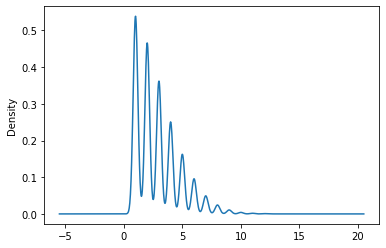

In [16]:
# Visualize the value counts
tweet_time.plot.density()

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
likes_count = biden_df.likes_count.value_counts()
likes_count

0        108351
1         29019
2         10850
3          5141
4          3080
          ...  
11056         1
7350          1
1717          1
5815          1
9979          1
Name: likes_count, Length: 794, dtype: int64

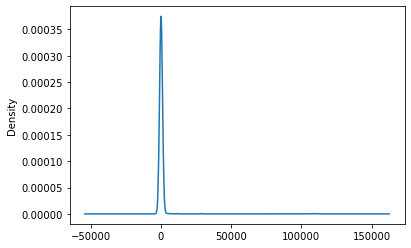

In [20]:
# Visualize the value counts
likes_count.plot.density()

ValueError: x and y must have same first dimension, but have shapes (794,) and (58864,)

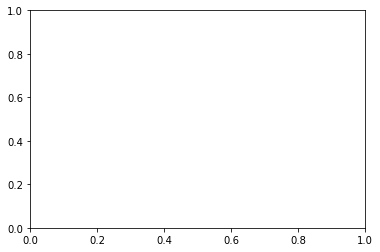

In [22]:
fig, ax = plt.subplots()
ax.plot(likes_count, tweet_time)
ax.set_title('A single plot')